In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "carlndatas"

## 1. Assessing Data Quality
## Load the following packages: dplyr, na.tools, tidyimpute (version from github decisionpatterns/tidyimpute”)
## Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of each car1 
## (a) Check if there are any missing values.

In [48]:
library(naniar)
library(dplyr)
library(tidyverse)

In [27]:
# Cargar el archivo .Rdata
load("/kaggle/input/carlndatas/carIns_final.Rdata")

# Mostrar los objetos disponibles en el entorno de trabajo
ls()

print(carIns)

[1] "auth"                      "carIns"                   
 [3] "carIns_final"              "columnas_faltantes"       
 [5] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
 [7] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
 [9] "KAGGLE_USER_SECRETS_TOKEN" "TokenBigQueryKernel"

# A tibble: 205 × 26
    symb normLoss make        fuelType aspiration nDoors bodyStyle   driveWheels
   <int>    <int> <fct>       <fct>    <fct>      <fct>  <fct>       <fct>      
 1     3       NA alfa-romero gas      std        two    convertible rwd        
 2     3       NA alfa-romero gas      std        two    convertible rwd        
 3     1       NA alfa-romero gas      std        two    hatchback   rwd        
 4     2      164 audi        gas      std        four   sedan       fwd        
 5     2      164 audi        gas      std        four   sedan       4wd        
 6     2       NA audi        gas      std        two    sedan       fwd        
 7     1      158 audi        gas      std        four   sedan       fwd        
 8     1       NA audi        gas      std        four   wagon       fwd        
 9     1      158 audi        gas      turbo      four   sedan       fwd        
10     0       NA audi        gas      turbo      two    hatchback   4wd        
# ℹ 195

In [28]:
# Cargar el conjunto de datos carInsurance
load("/kaggle/input/carlndatas/carIns_final.Rdata")

# Verificar los valores faltantes usando any_na()
if (any_na(carIns)) {
  print(paste("Hay valores faltantes en las siguientes columnas:", paste(columnas_faltantes, collapse = ", ")))
} else {
  print("No hay valores faltantes en el conjunto de datos.")
}

[1] "Hay valores faltantes en las siguientes columnas: normLoss, nDoors, bore, stroke, horsePower, peakRpm, price"


## (b) Count the number of cases that have, at least, one missing value.
## Tip: use the function filter_any_na() and then count()

In [36]:
ls()
library(dplyr)

cases_with_missing <- carIns %>%
  filter(if_any(everything(), is.na)) %>%
  count()

print(paste("El número de casos con al menos un valor faltante es:", cases_with_missing$n))


[1] "auth"                      "carIns"                   
 [3] "carIns_final"              "cases_with_missing"       
 [5] "columnas_faltantes"        "get_user_secret"          
 [7] "GET_USER_SECRET_ENDPOINT"  "KAGGLE_BASE_URL"          
 [9] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[11] "TokenBigQueryKernel"

[1] "El número de casos con al menos un valor faltante es: 46"


## (c) Create a new data set by removing all the cases that have missing values.
## Tip: use the function drop_rows_any_na()

In [47]:
# Eliminar las filas con valores faltantes
carIns_sin_na <- na.omit(carIns)

print(carIns_sin_na)

# A tibble: 159 × 26
    symb normLoss make      fuelType aspiration nDoors bodyStyle driveWheels
   <int>    <int> <fct>     <fct>    <fct>      <fct>  <fct>     <fct>      
 1     2      164 audi      gas      std        four   sedan     fwd        
 2     2      164 audi      gas      std        four   sedan     4wd        
 3     1      158 audi      gas      std        four   sedan     fwd        
 4     1      158 audi      gas      turbo      four   sedan     fwd        
 5     2      192 bmw       gas      std        two    sedan     rwd        
 6     0      192 bmw       gas      std        four   sedan     rwd        
 7     0      188 bmw       gas      std        two    sedan     rwd        
 8     0      188 bmw       gas      std        four   sedan     rwd        
 9     2      121 chevrolet gas      std        two    hatchback fwd        
10     1       98 chevrolet gas      std        two    hatchback fwd        
# ℹ 149 more rows
# ℹ 18 more variables: engineLocation

## (d) Create a new data set by imputing all the missing values with 0.
## Tip: explore the variants of the function impute()

In [56]:
library(tidyverse)

# Imputar los valores faltantes con 0 en carIns_sin_na
carIns_imputed <- carIns_sin_na %>%
  mutate_all(~replace_na(.x, 0))

# Visualizar el nuevo conjunto de datos con los valores imputados
print(carIns_imputed)


# A tibble: 159 × 26
    symb normLoss make      fuelType aspiration nDoors bodyStyle driveWheels
   <int>    <int> <fct>     <fct>    <fct>      <fct>  <fct>     <fct>      
 1     2      164 audi      gas      std        four   sedan     fwd        
 2     2      164 audi      gas      std        four   sedan     4wd        
 3     1      158 audi      gas      std        four   sedan     fwd        
 4     1      158 audi      gas      turbo      four   sedan     fwd        
 5     2      192 bmw       gas      std        two    sedan     rwd        
 6     0      192 bmw       gas      std        four   sedan     rwd        
 7     0      188 bmw       gas      std        two    sedan     rwd        
 8     0      188 bmw       gas      std        four   sedan     rwd        
 9     2      121 chevrolet gas      std        two    hatchback fwd        
10     1       98 chevrolet gas      std        two    hatchback fwd        
# ℹ 149 more rows
# ℹ 18 more variables: engineLocation

## (e) Create a new data set by imputing the mean in all the columns which have double type values.


In [63]:
library(dplyr)

# Imputar la media en las columnas con valores de tipo double
nuevo_carIns_imputado <- carIns_imputed %>% 
  mutate_if(is.double, ~ifelse(is.na(.), mean(., na.rm = TRUE), .))

# Visualizar el nuevo conjunto de datos con los valores imputados
print(nuevo_carIns_imputado)


# A tibble: 159 × 26
    symb normLoss make      fuelType aspiration nDoors bodyStyle driveWheels
   <int>    <int> <fct>     <fct>    <fct>      <fct>  <fct>     <fct>      
 1     2      164 audi      gas      std        four   sedan     fwd        
 2     2      164 audi      gas      std        four   sedan     4wd        
 3     1      158 audi      gas      std        four   sedan     fwd        
 4     1      158 audi      gas      turbo      four   sedan     fwd        
 5     2      192 bmw       gas      std        two    sedan     rwd        
 6     0      192 bmw       gas      std        four   sedan     rwd        
 7     0      188 bmw       gas      std        two    sedan     rwd        
 8     0      188 bmw       gas      std        four   sedan     rwd        
 9     2      121 chevrolet gas      std        two    hatchback fwd        
10     1       98 chevrolet gas      std        two    hatchback fwd        
# ℹ 149 more rows
# ℹ 18 more variables: engineLocation

## (f) Create a new data set by imputing the mode in all the columns which have integer type values.


In [64]:
# Crear una copia del dataframe carIns para almacenar el nuevo conjunto de datos imputado
carIns_imputado <- nuevo_carIns_imputado

# Obtener las columnas enteras del dataframe carIns
columnas_enteras <- sapply(carIns, is.integer)

# Iterar sobre las columnas enteras y realizar la imputación de la moda
for (col in names(carIns)[columnas_enteras]) {
  carIns_imputado[[col]] <- ifelse(is.integer(carIns[[col]]), mode(carIns[[col]]), carIns[[col]])
}

# Mostrar el nuevo conjunto de datos imputado
print(carIns_imputado)

# A tibble: 159 × 26
   symb    normLoss make      fuelType aspiration nDoors bodyStyle driveWheels
   <chr>   <chr>    <fct>     <fct>    <fct>      <fct>  <fct>     <fct>      
 1 numeric numeric  audi      gas      std        four   sedan     fwd        
 2 numeric numeric  audi      gas      std        four   sedan     4wd        
 3 numeric numeric  audi      gas      std        four   sedan     fwd        
 4 numeric numeric  audi      gas      turbo      four   sedan     fwd        
 5 numeric numeric  bmw       gas      std        two    sedan     rwd        
 6 numeric numeric  bmw       gas      std        four   sedan     rwd        
 7 numeric numeric  bmw       gas      std        two    sedan     rwd        
 8 numeric numeric  bmw       gas      std        four   sedan     rwd        
 9 numeric numeric  chevrolet gas      std        two    hatchback fwd        
10 numeric numeric  chevrolet gas      std        two    hatchback fwd        
# ℹ 149 more rows
# ℹ 18 more v

In [68]:
# Cargar la biblioteca imputeTS
library(imputeTS)

# Crear un nuevo conjunto de datos copiando el conjunto de datos original
nuevoDataSet <- carIns_imputado

# Imputar el valor más frecuente en la columna "nDoors"
nuevoDataSet$nDoors <- na_replace(nuevoDataSet$nDoors, "max")

# Imprimir el nuevo conjunto de datos
print(nuevoDataSet)

# A tibble: 159 × 26
   symb    normLoss make      fuelType aspiration nDoors bodyStyle driveWheels
   <chr>   <chr>    <fct>     <fct>    <fct>      <fct>  <fct>     <fct>      
 1 numeric numeric  audi      gas      std        four   sedan     fwd        
 2 numeric numeric  audi      gas      std        four   sedan     4wd        
 3 numeric numeric  audi      gas      std        four   sedan     fwd        
 4 numeric numeric  audi      gas      turbo      four   sedan     fwd        
 5 numeric numeric  bmw       gas      std        two    sedan     rwd        
 6 numeric numeric  bmw       gas      std        four   sedan     rwd        
 7 numeric numeric  bmw       gas      std        two    sedan     rwd        
 8 numeric numeric  bmw       gas      std        four   sedan     rwd        
 9 numeric numeric  chevrolet gas      std        two    hatchback fwd        
10 numeric numeric  chevrolet gas      std        two    hatchback fwd        
# ℹ 149 more rows
# ℹ 18 more v

## (h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?
## Tip: use the functions distinct() and count()


In [70]:
# Combinar los conjuntos de datos imputados
conjuntoFinal <- rbind(carIns_imputado, nuevoDataSet, carIns_imputed, nuevo_carIns_imputado)

# Verificar si hay casos duplicados
duplicados <- conjuntoFinal[duplicated(conjuntoFinal), ]
cantidadDuplicados <- nrow(duplicados)

# Imprimir los casos duplicados y la cantidad de duplicados
print(duplicados)
print(cantidadDuplicados)


# A tibble: 351 × 26
   symb    normLoss make       fuelType aspiration nDoors bodyStyle driveWheels
   <chr>   <chr>    <fct>      <fct>    <fct>      <fct>  <fct>     <fct>      
 1 numeric numeric  dodge      gas      std        four   sedan     fwd        
 2 numeric numeric  honda      gas      std        two    hatchback fwd        
 3 numeric numeric  honda      gas      std        two    hatchback fwd        
 4 numeric numeric  mazda      gas      std        two    hatchback fwd        
 5 numeric numeric  mazda      gas      std        two    hatchback fwd        
 6 numeric numeric  mazda      gas      std        two    hatchback fwd        
 7 numeric numeric  mazda      gas      std        four   sedan     fwd        
 8 numeric numeric  mitsubishi gas      std        two    hatchback fwd        
 9 numeric numeric  mitsubishi gas      std        two    hatchback fwd        
10 numeric numeric  mitsubishi gas      std        four   sedan     fwd        
# ℹ 341 more rows
#

## 3. With the seed 111019 obtain the following samples on the car insurance data set.
## Tip: use the function sample_frac()

In [17]:
# Cargar el archivo .Rdata
load("/kaggle/input/carlndatas/carInsurance.Rdata")

# Establecer el valor de la semilla
set.seed(111019)

# Muestra el 50% de los datos
muestra_50 <- carIns[sample(nrow(carIns), nrow(carIns) * 0.5), ]

# Muestra el 30% de los datos
muestra_30 <- carIns[sample(nrow(carIns), nrow(carIns) * 0.3), ]

# Muestra el 20% de los datos
muestra_20 <- carIns[sample(nrow(carIns), nrow(carIns) * 0.2), ]



In [19]:
# Establecer el valor de la semilla
set.seed(111019)

# Obtener una muestra aleatoria del 60% de los casos con reemplazo
muestra_60 <- carIns[sample(nrow(carIns), nrow(carIns) * 0.6, replace = TRUE), ]


In [20]:
# Instalar el paquete splitstackshape si no está instalado
# install.packages("splitstackshape")

# Cargar el paquete splitstackshape
library(splitstackshape)

# Establecer el valor de la semilla
set.seed(111019)

# Obtener una muestra estratificada del 60% de los casos según el atributo fuelType
muestra_estratificada <- stratified(carIns, c("fuelType"), size = 0.6)

# Ver la distribución de valores en la muestra estratificada
table(muestra_estratificada$fuelType)


diesel    gas 
    12    111 

## 4. Load the package corrplot and select the numeric attributes of the car insurance data set.
## (a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.
## (b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables.
## (c) Plot the all correlation information using the function corrplot. Explore some of its parameters.

In [23]:
library(corrplot)

In [24]:
# Seleccionar solo las variables numéricas del conjunto de datos
carIns_numeric <- carIns[, sapply(carIns, is.numeric)]

# Calcular el coeficiente de correlación de Pearson
cor_matrix <- cor(carIns_numeric)

In [26]:
# Instalar el paquete psych si no está instalado
# install.packages("psych")

# Cargar el paquete psych
library(psych)

# Calcular los valores de p y los intervalos de confianza
cor_p_values <- cor.mtest(carIns_numeric)$p
cor_conf_intervals <- cor.mtest(carIns_numeric)$CI

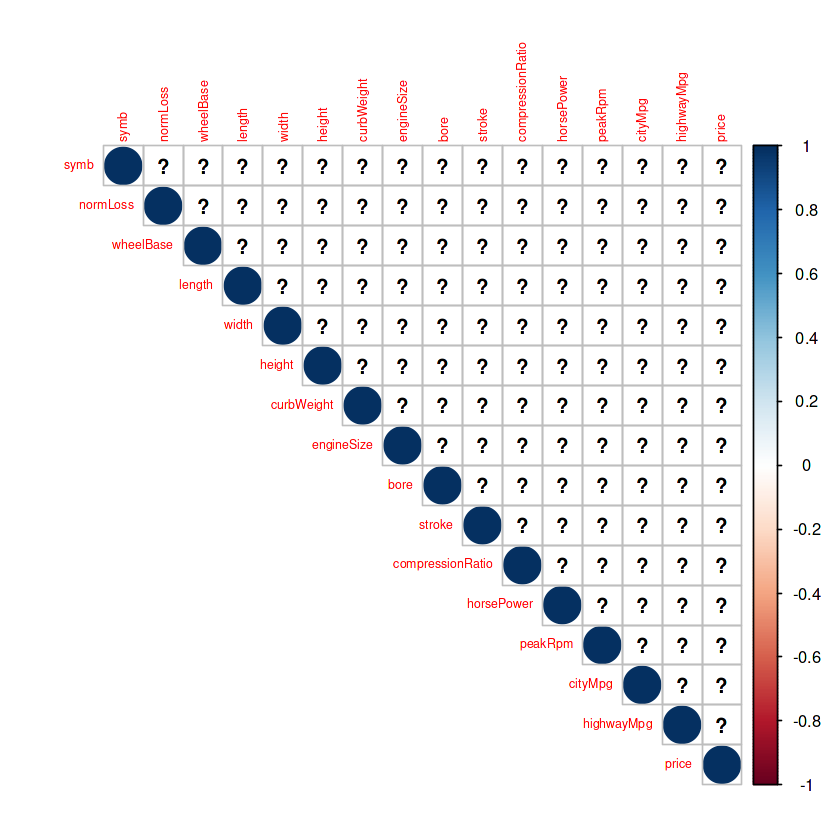

In [28]:
# Crear una matriz triangular inferior con los coeficientes de correlación
cor_lower <- cor_matrix
cor_lower[upper.tri(cor_lower)] <- NA

# Plot de la matriz de correlación
corrplot(cor_lower, method = "circle", type = "upper", tl.cex = 0.6)

## 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.
## (a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.
## (b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter.

In [29]:
# Cargar el paquete datasets
library(datasets)

# Cargar el conjunto de datos USJudgeRatings
data(USJudgeRatings)

In [30]:
# Aplicar la función prcomp() al conjunto de datos USJudgeRatings
pca_result <- prcomp(USJudgeRatings, scale. = TRUE)

# Inspeccionar cómo cada variable se obtiene mediante la combinación lineal de cada componente
print(pca_result$rotation)


              PC1          PC2          PC3          PC4          PC5
CONT  0.003075143 -0.932890644  0.334756548  0.058576867  0.093438368
INTG -0.288550775  0.182040993  0.549360126  0.173977074 -0.014543880
DMNR -0.286884206  0.197565743  0.556490386 -0.124412022 -0.228832817
DILG -0.304354091 -0.036304667 -0.163629910  0.321395544 -0.301936920
CFMG -0.302572733 -0.168393523 -0.207341904  0.012949223 -0.448430522
DECI -0.301891969 -0.127877299 -0.297902771  0.030491779 -0.424003128
PREP -0.309406446 -0.032230248 -0.151869345  0.213656069  0.202853400
FAMI -0.306679527  0.001315183 -0.195290454  0.200651140  0.507470003
ORAL -0.312708348  0.003625720 -0.002150634 -0.007441042  0.246059421
WRIT -0.311061231  0.031378756 -0.056045596  0.137104995  0.305562842
PHYS -0.280723624 -0.089037698 -0.154000444 -0.841266046  0.118424976
RTEN -0.309790218  0.039381306  0.172869757 -0.184223629  0.006717911
              PC6          PC7           PC8         PC9        PC10
CONT -0.004064432  0.

In [36]:
library(ggbiplot)
ggbiplot(pca_result, obs.scale = 1, var.scale = 1, labels = rownames(USJudgeRatings))


ERROR: Error in library(ggbiplot): there is no package called ‘ggbiplot’
